<a href="https://colab.research.google.com/github/nakisa84/Springboard/blob/main/capston%202%20project/notebooks/BC_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Survival Prediction Exploratory Data Analysis**

# 1.Introduction

In the last section data wrangling was done by exploring and cleaning the data. Most of the features were categorical and were converted to numeric data using labeling method. Also as the data was imbalanced  SMOTE method used to add some synthetic data and eventually very nice and balanced data was produced.

In this section we will dive deeper to explore the data.


In [1]:
import pandas as pd
import numpy as np
#from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2



# 2.Load the data

In [2]:
# loading data in colab environment 
# from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/My Drive/Springboard/capston 2 project/data/bc_data_synthetic.csv')

# loading data in Jupyter environment 
df = pd.read_csv('../data/bc_data_synthetic.csv')

print('shape: ',df.shape)
df.head()

shape:  (6816, 27)


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,...,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,Grade_Grade II,Grade_Grade III,Grade_anaplastic,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status
0,43,40,19,11,1,1,0,1,0,0,...,0,0,1,1,0,0,1,1,1,0
1,47,45,25,9,2,1,0,1,0,0,...,1,0,0,1,0,0,1,1,1,0
2,67,25,4,1,2,0,1,1,0,0,...,0,0,0,0,1,0,1,1,1,1
3,46,19,26,1,2,0,1,0,0,0,...,0,0,0,1,0,0,1,1,1,1
4,63,35,21,5,3,0,1,1,0,0,...,1,0,0,1,0,0,1,1,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Data columns (total 27 columns):
Age                             6816 non-null int64
Tumor Size                      6816 non-null int64
Regional Node Examined          6816 non-null int64
Reginol Node Positive           6816 non-null int64
Survival Months                 6816 non-null int64
Race_Other                      6816 non-null int64
Race_White                      6816 non-null int64
Marital Status_Married          6816 non-null int64
Marital Status_Separated        6816 non-null int64
Marital Status_Single           6816 non-null int64
Marital Status_Widowed          6816 non-null int64
T Stage_T2                      6816 non-null int64
T Stage_T3                      6816 non-null int64
T Stage_T4                      6816 non-null int64
N Stage_N2                      6816 non-null int64
N Stage_N3                      6816 non-null int64
6th Stage_IIB                   6816 non-null int64
6th Stage

# 3. Explore The Data

/Users/nakisaabbasi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


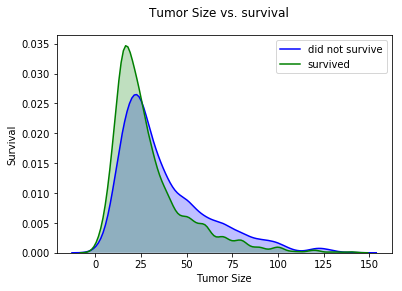

In [4]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Status"]==1]["Tumor Size"], shade=True, color="blue", label="did not survive", ax=ax)
sns.kdeplot(df[df["Status"]==0]["Tumor Size"], shade=True, color="green", label="survived", ax=ax)

ax.set_xlabel("Tumor Size")
ax.set_ylabel("Survival")

fig.suptitle("Tumor Size vs. survival");

/Users/nakisaabbasi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


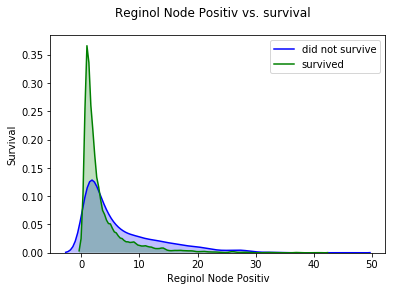

In [5]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Status"]==1]["Reginol Node Positive"], shade=True, color="blue", label="did not survive", ax=ax)
sns.kdeplot(df[df["Status"]==0]["Reginol Node Positive"], shade=True, color="green", label="survived", ax=ax)

ax.set_xlabel("Reginol Node Positiv")
ax.set_ylabel("Survival")

fig.suptitle("Reginol Node Positiv vs. survival");

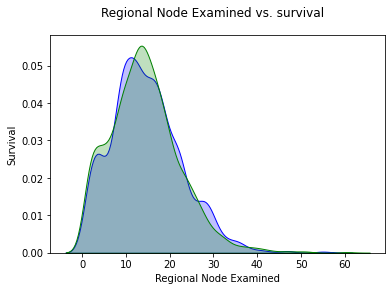

In [27]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Status"]==1]['Regional Node Examined'], shade=True, color="blue", label="did not survive", ax=ax)
sns.kdeplot(df[df["Status"]==0]['Regional Node Examined'], shade=True, color="green", label="survived", ax=ax)

ax.set_xlabel("Regional Node Examined")
ax.set_ylabel("Survival")

fig.suptitle("Regional Node Examined vs. survival");

/Users/nakisaabbasi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


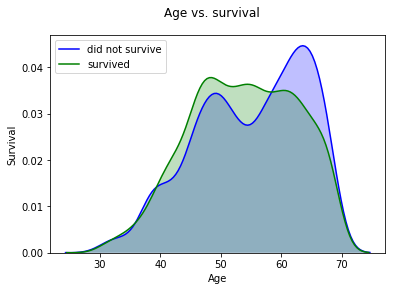

In [9]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Status"]==1]["Age"], shade=True, color="blue", label="did not survive", ax=ax)
sns.kdeplot(df[df["Status"]==0]["Age"], shade=True, color="green", label="survived", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Survival")

fig.suptitle("Age vs. survival");

/Users/nakisaabbasi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


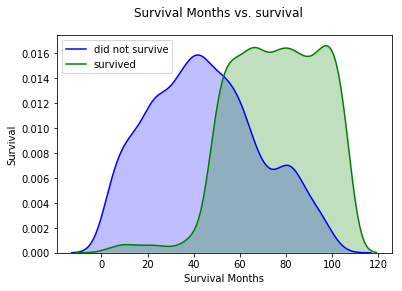

In [11]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Status"]==1]['Survival Months'], shade=True, color="blue", label="did not survive", ax=ax)
sns.kdeplot(df[df["Status"]==0]['Survival Months'], shade=True, color="green", label="survived", ax=ax)

ax.set_xlabel('Survival Months')
ax.set_ylabel("Survival")

fig.suptitle("Survival Months vs. survival");

In [6]:
df.columns

Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months', 'Race_Other', 'Race_White', 'Marital Status_Married',
       'Marital Status_Separated', 'Marital Status_Single',
       'Marital Status_Widowed', 'T Stage_T2', 'T Stage_T3', 'T Stage_T4',
       'N Stage_N2', 'N Stage_N3', '6th Stage_IIB', '6th Stage_IIIA',
       '6th Stage_IIIB', '6th Stage_IIIC', 'Grade_Grade II', 'Grade_Grade III',
       'Grade_anaplastic', 'A Stage_Regional', 'Estrogen Status_Positive',
       'Progesterone Status_Positive', 'Status'],
      dtype='object')

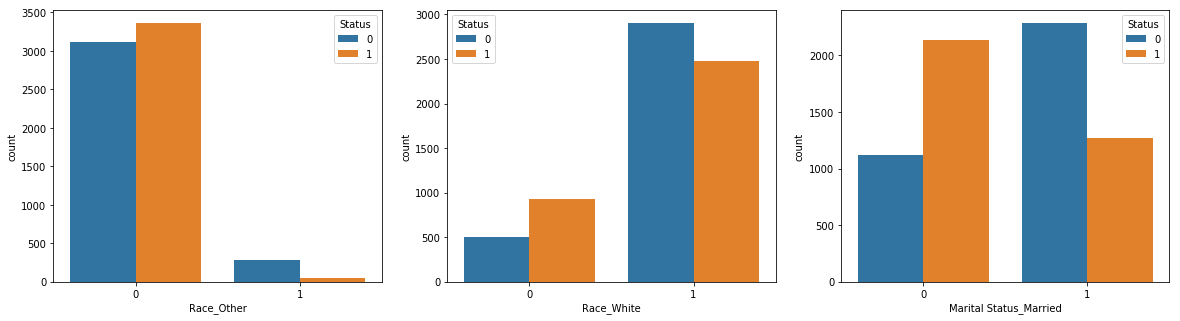

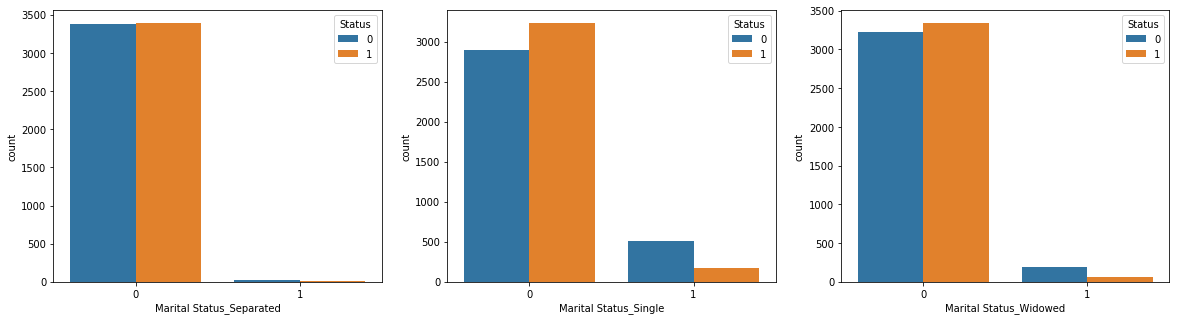

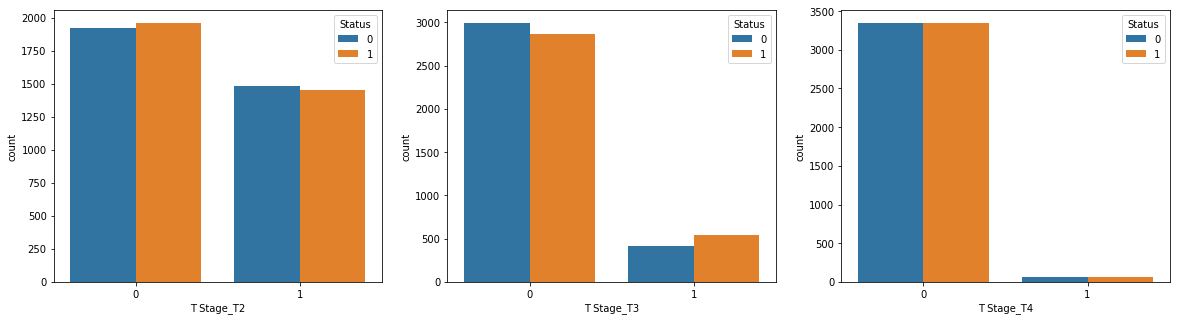

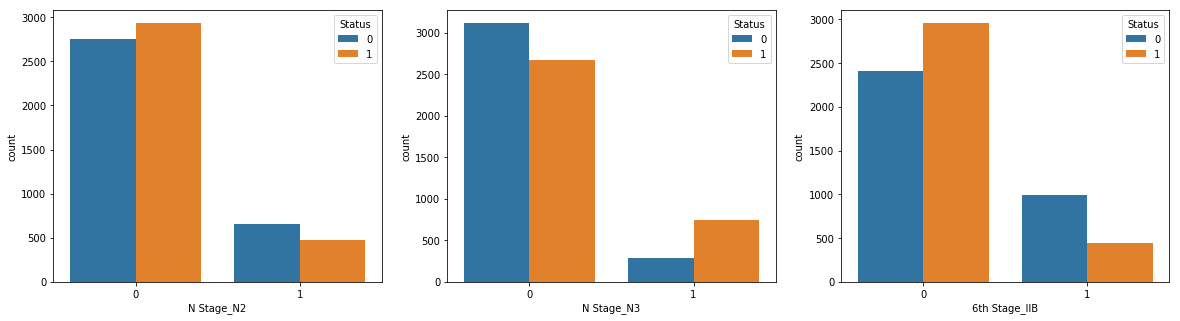

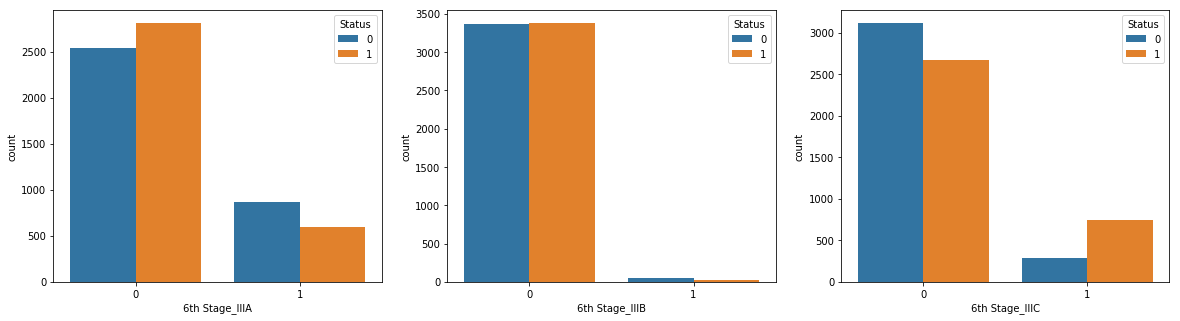

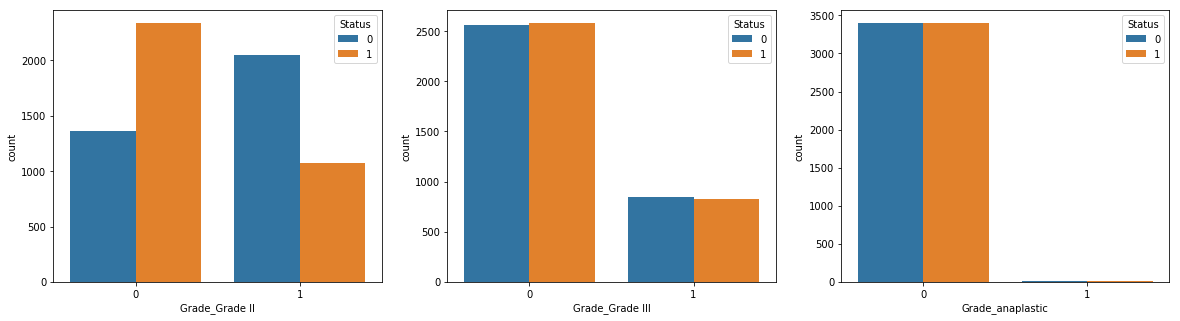

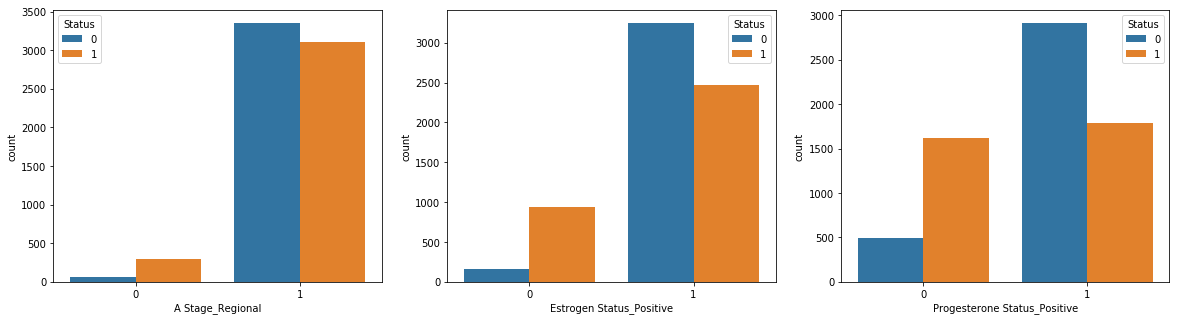

In [14]:
plt.close('all')
countplot_features(df.drop(['Age','Survival Months','Tumor Size', 'Regional Node Examined', 'Reginol Node Positive'],axis = 1),3)

As seen in the above graphs some features show some contributions to the target classificatiosn. For example, maried person could live longer, or people with grade 2 cancer live longer and that could be that their grade is higher and the will not survive so long. Also Being Estrogen or Progestrone positive could lead to a longer life.
